### Convolutional Neural Network

##### Convolutional Neural Network Example Flowchart

上一节中的 Linear Model，我们在 MNIST 数据集上得到 91.7% 的结果；而使用 CNN，可以得到接近 99% 的成绩！ CNN 的 Flowchar 如下

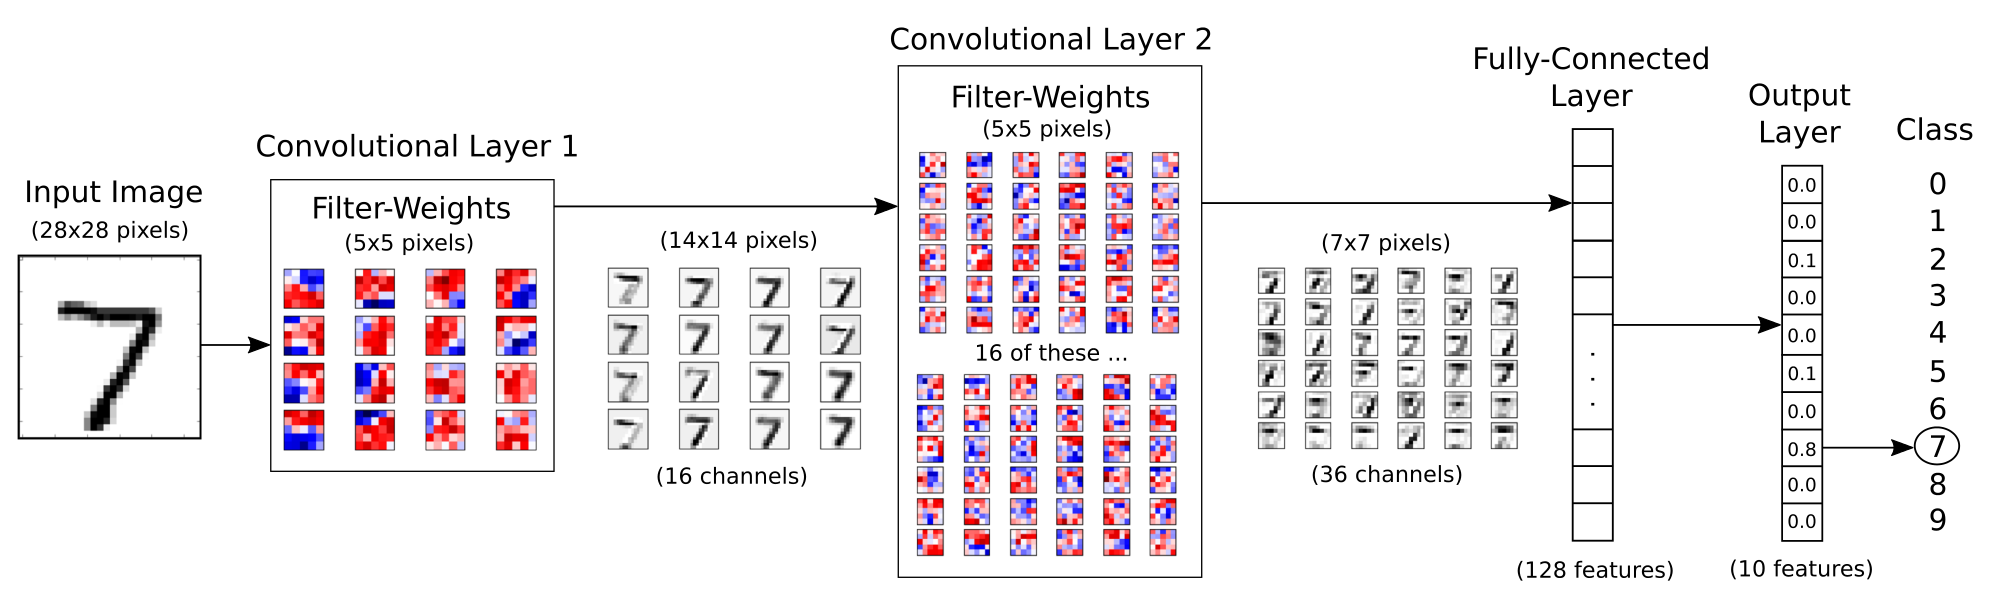

In [3]:
from IPython.display import Image
Image('images/02_network_flowchart.png')

1. 图中是一个 input image 的情况，而实际上，我们 feed in 的是一个 mini batch 的 images，后面假设 mini batch 中图片的个数为 N

2. 图片本身其实有一个 channel 的概念，对于 CNN 的输入层 input images 来说，通常是指图片像素在红绿蓝(RGB) 3 个颜色上各自的数值，于是 3 个 channels 上各自形成一个"子图片"，3 个子图片合在一起才是原始图片；不过这里由于是灰度图片，故此只有一个 channel；这里要弄清晰的是，一个图片，是指其全部 channels 的子图片的集合，子图片并不限于一张

3. channel 的概念，在 CNN 的 convolutional 层 (隐藏层中的一种) 被推广，不再限于 RGB 的概念，而是定义为一个 filter 对原图片 (注意这个原图片本身也是由各 channels 子图片合成的) 进行卷积后得到的新图片；就是说，一个原图片，经过多少个 filters 卷积，就得到多少个 channels 的输出图片

4. 图中所有的 filters 都是 5 * 5，同时采用 "SAME" 的方式进行卷积。这种方式在图片边缘会采用 padding 的方法，故此卷积之后得到的新图片会和原图片有相同的尺寸 (CS231n 第7课中指出，padding = (filter 边长 - 1) / 2 时，可以保证卷积前后尺寸不变； filter 边长通常为奇数)；每个 Convolutional 层都带一个 Pooling，把卷积的结果图片 downsampling 为 1/4 大小的最终结果

好了，基础打完了，看一下流程，才能对上面所说的有更清楚的理解

Convolutional Layer 1. 
- 输入 N 个 28 * 28 的图片，每个图片都只有一个 channel
- Layer 属性：输入图片的 channel 数，这里是 1；filter 的尺寸 5 * 5；filter 个数 (也就是说输出结果图片的 channel 个数) 16
- 输出：N 个 14 * 14 的图片 (经过了 Pooling)，每个图片 16 个 channels

16 个 filters，每个 filters 通过卷积去抽取原图片某一方面的特征，得到 28 * 28 的对应特征图；再通过 Pooling 被 downsampling 为 14 * 14 的特征图；16 个 filters 得到 16 套特征；这 16 套特征都是原图片的特征，都对应一个原图片，故此，最后得到的仍然是 N 个图片，只不过每个图片都有 16 套特征，对应 16 个 channels (子图片)

Convolutional Layer 2.
- 输入 N 个 14 * 14 的图片，每个图片都由 16 个 channels 的特征子图片组成，对应于 Convolutional Layer 1 的 16 个 filter 卷积输出。
- Layer 属性：输入图片的 channel 数，这里是 16；filter 的尺寸仍是 5 * 5；filter 个数 (也就是说输出结果图片的 channels 个数) 36。由上图看到，这层的 filters 分为 16 组，每组 36 个 filters。或者说，36 个 filters，每个 filter 又是由 16 组子 filters 组成，每个子 filter 对应一个输入图片的一个 channel 子图片做卷积，得到 16 个卷积结果，然后把 16 个卷积结果 element-wise 加在一起，得到这个 filter 的最终卷积结果，即一个和输入图片同尺寸的结果图片。然后 36 个 filters 得到 36 个卷积结果，对应原图片在 36 个 filters 下得到的 36 个 channels 的卷积特征结果；那么，同上面 Layer 1 的结果一样，最终得到的仍然是 N 个图片，每个图片都有 36 套特征 (对此部分内容，可以详见 CS231n 第 7 课的介绍)
- 输出：N 个 7 * 7 的图片 (经过了 Pooling)，每个图片 36 个 channels

这里如果没有看懂，请仔细观察下方的图片。该图非常类似本例中的 Flowchart，只是维度上有些不同。着重看 C1 到 S2 层之间的连接线，C1 层 4 个图片实际上是同一张输入图片的 4 个输入 channels 特征子图片；而 S2 层则对一个 6 个 filters 得到的 6 个输出 channels 的卷积结果。可以看到每个 filter 都会从 4 个输入 channels 自图片的相同位置进行卷积，然后合在一起输入到对应 filter 的卷积结果子图片中。

另外，从上面两个 Convolutional Layer 来看，输入和输出的图片参数是一致的，都是图片的个数、尺寸、channel 数；Convolutional Layer 自身的属性参数为 filter 的尺寸、个数、pooling 等

Fully-Connected Layer 
- 输入：N 个 7 * 7 的图片，每个图片由 36 个子 channels 组成，故此，每个图片的总变量数为 36 * 7 * 7 = 1764。先把这 1764 个变量 flatten 扁平化，最终得到 N * 1764 的二维矩阵
- Layer 属性：128 个神经元，也就是说 W 权重矩阵为 1764 * 128
- 输出：N * 128，就是说每个图片被浓缩为 128 维的矢量

Output Layer
- 输入：就是上面的输出 N * 128 矩阵
- Layer 属性：10 个神经源，也就是说 128 * 10 维权重矩阵
- 输出： N * 10，就是说每个图片输出一个 10 维度的矢量，对应图片的 10 个分类

Loss function：Cross Entropy 交叉熵

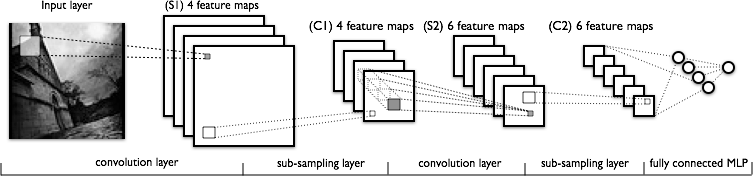

In [3]:
Image('images/mylenet.png')

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math

In [5]:
tf.__version__

'0.8.0'

##### Part I. 探索数据集

In [6]:
# The MNIST data-set is about 12 MB and will be downloaded automatically if it is not located in the given path.
# 手动从 http://yann.lecun.com/exdb/mnist/ 下载到容器 /notebooks/data/MNIST/ 目录下
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)    # 把 images 和 labels 都导入为 one-hot vectors
data[0]

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [8]:
print("TrainingSet: {}".format(len(data.train.labels)))
print("TestSet: {}".format(len(data.test.labels)))
print("ValidationSet: {}".format(len(data.validation.labels)))

TrainingSet: 55000
TestSet: 10000
ValidationSet: 5000


In [10]:
data.test.labels[0:5, :]    # 可以看到，待预测 label 是 10 维的，就是说 10 个分类：0 ~ 9

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [12]:
# 看看具体是 0 ~ 9 中的哪一个
data.test.cls = np.array([l.argmax() for l in data.test.labels])
data.test.cls[0:5]

array([7, 2, 1, 0, 4])

In [15]:
data.train.images.shape      # 看到 images 也是 one-hot vector，784 = 28 * 28

(55000, 784)

In [17]:
img_size = 28
img_size_flat = img_size * img_size # 784
img_shape = (img_size, img_size)
num_classes = 10

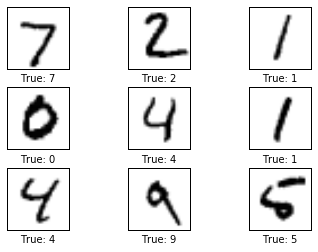

In [22]:
# 绘制辅助函数
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9  # 绘制 9 个图像
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_shape), cmap='binary')   # 灰度图片，故此 binary
        # 显示标签
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])
        ax.set_xlabel(xlabel)
        ax.set_xticks([])   # 不显示刻度
        ax.set_yticks([])

images = data.test.images[0:9]
cls_true = data.test.cls[0:9]   # data.test.labels 是 one-hot 的，data.test.cls 是上面转成1维的结果
plot_images(images=images, cls_true=cls_true)

##### Part II. Layer definations

In [24]:
# 定义参数
filter_size1 = 5
num_filters1 = 16

filter_size2 = 5
num_filters2 = 36

fc_size = 128

num_channels = 1    # 初始只有一个 channel (灰度图片)

In [30]:
# 定义随机初始化函数
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))   # 正态分布 tf.truncated_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)

def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))   # 把 tf.constant 转为 Variable; 每个 filter 的所有子 filter 共享一个 bias

In [31]:
# 抽象一个 Convolutional Layer 的函数；输入、输出见上面的解释部分
def new_conv_layer(input,               # 初始输入，或者上一层输出的 N 个图片，每个图片有尺寸和 channel 数；故此，共计 4 维
                   num_input_channels,  # 输入图片的 channel 数，也就是本层每个 filter的“子 filter” 个数
                   filter_size,         # filter 尺寸
                   num_filters,         # filter 个数，也就是输出图片的 channel 数，等于下一层的 num_input_channels 参数
                   use_pooling=True):   # 是否使用 2*2 的 pooling
    shape = [filter_size, filter_size, num_input_channels, num_filters]   # 本层的属性，同时也是本层 weights 的总维度; 由 tf 决定了维度的定义和顺序
    weights = new_weights(shape)
    biases = new_biases(length=num_filters)  # 每个 filters 对应一个 bias
    layer = tf.nn.conv2d(input=input, filter=weights,
                         strides=[1,1,1,1],  # 4 维，对应 Input 的 4 维；第一维表示在输入图片的个数上 stride；最后一维表示在 channel 上 stride；这两个都要求必须是 1
                         padding='SAME')     #                           中间两维表示在图片尺寸上 stride，这里是 1，表示每次移动一个像素；这两维可以设置
    layer += biases   # 这里 layer 也是 4 维，完全类似 input，分别为 图片个数、尺寸、结果 channel 数(即本层 filter 个数)
                      # biase 是 1 维，就是本层 filter 个数；那么这个加号，就是对于每个 filter 维度上进行一个矩阵和标量的相加，
                      # 也即每个图片的每个像素的 conv2d 的结果 (和 weight 相乘) 再加上对应的 bias
    if use_pooling:
        layer = tf.nn.max_pool(value=layer, ksize=[1,2,2,1],         # max pooling 的区域 pooling filter = 2 * 2; 每做一次 pooling 移动 strides = 2 * 2
                               strides=[1,2,2,1], padding="SAME")    # 这里的 SAME 指设置 padding 让保持图片尺寸，但是 strides = 2*2，使得图片必然减小为 1/4 
    layer = tf.nn.relu(layer)   # activation
    return  layer, weights      # 本来 return layer (4 维) 就可以，但是需要返回 weights 做 tuning 和 visualization

In [88]:
# Conv 层输出的 4 维结果，在进入 Full Connection Layer 之前，需要降维到 2 维矩阵。
# 方法是，保持第一维也就是图片个数维度不变，其他3个维度 (图片尺寸、channels) 压平到一个维度，也就是把每个图片降为一维矢量
def flatten_layer(layer):
    layer_shape = layer.get_shape()   # 这里的返回是一个 [Dimension(?), Dimension(), Dimension(), Dimension()]，无法转为 int
    num_features = np.array([int(s) for s in layer_shape[1:4]]).prod()    # width * height * num_channels
    flatten = tf.reshape(layer, [-1, num_features])    # -1 表示自动计算，也就是说保持 feature 数，自动计算个数
    return flatten, num_features

In [35]:
# 创建新的 full connecton layer
def new_fc_layer(input, num_inputs, num_outputs, use_relu=True):  # input 是上面降维过的2维矢量 (个数 * num_features)
    weights = new_weights(shape=[num_inputs, num_outputs])   # num_inputs & num_outputs 为输入层和本层的节点数 (features 数)
    biases = new_biases(length=num_outputs)
    layer = tf.matmul(input, weights) + biases      # (num_images * num_features) * (num_features * num_outputfeatures) + num_outputfeatures; 显然这个加号也是跨维度的相加
    if use_relu:
        layer = tf.nn.relu(layer)
    return layer

##### Part III. Tensorflow Graph Design

In [75]:
# 定义常量
x = tf.placeholder(tf.float32, [None, img_size_flat], name='x')  # None 表示 x 可以表示任意多个 images；images 数据的维度为 img_size_flat；共计 N * 784 维
# reshape 为 Conv 层 input 的维度
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])  # num_channels 此时为 1，灰度图片； -1 表示第一维自动计算
y_true = tf.placeholder(tf.float32, [None, num_classes], name='y_true') # 类似上面，y_true 每个标签维度为 num_classes(10)，也即 one-hot ，共计 N * 10 维
y_true_cls = tf.argmax(y_true, dimension=1)  # 1 维标签结果

In [76]:
# Conv Layer1
layer_conv1, weight_conv1 = new_conv_layer(input=x_image, num_input_channels=num_channels, filter_size=filter_size1, 
                                           num_filters=num_filters1, use_pooling=True)

In [77]:
layer_conv1     # 下面会看到，tf 自动计算出 conv + max pooling + relu 之后得到的图片尺寸和 channels

<tf.Tensor 'Relu_3:0' shape=(?, 14, 14, 16) dtype=float32>

In [78]:
# Conv Layer2
layer_conv2, weight_conv2 = new_conv_layer(input=layer_conv1, num_input_channels=num_filters1, filter_size=filter_size2, 
                                           num_filters=num_filters2, use_pooling=True)     # 看到 num_input_channels=num_filters1  ！！！

In [79]:
layer_conv2     # 下面会看到，tf 自动计算出 conv + max pooling + relu 之后得到的图片尺寸和 channels

<tf.Tensor 'Relu_4:0' shape=(?, 7, 7, 36) dtype=float32>

In [93]:
# Flatten Layer
layer_flat, num_features = flatten_layer(layer_conv2)
layer_flat, num_features    # features = 7 * 7 * 36

(<tf.Tensor 'Reshape_8:0' shape=(?, 1764) dtype=float32>, 1764)

In [95]:
# Full Connection 1
layer_fc1 = new_fc_layer(input=layer_flat, num_inputs=num_features, num_outputs=fc_size, use_relu=True)    # fc_size is defined as 128
layer_fc1

<tf.Tensor 'Relu_6:0' shape=(?, 128) dtype=float32>

In [96]:
# Full Connection 2 which is also output Layer
layer_fc2 = new_fc_layer(input=layer_fc1, num_inputs=fc_size, num_outputs=num_classes, use_relu=False) 
layer_fc2

<tf.Tensor 'add_7:0' shape=(?, 10) dtype=float32>

In [97]:
# Output prediction
y_pred = tf.nn.softmax(layer_fc2)      # softmax - 也就是各个元素计算 e^ ${ele}，然后 normalize；故此还是 10 个元素，
y_pred

<tf.Tensor 'Softmax:0' shape=(?, 10) dtype=float32>

In [99]:
y_pred_cls = tf.argmax(y_pred, dimension=1)    # 找到其中最大的作为结果 class
y_pred_cls

<tf.Tensor 'ArgMax_4:0' shape=(?,) dtype=int64>

In [101]:
# Cost-function，交叉熵
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2, labels=y_true)
cross_entropy

<tf.Tensor 'SoftmaxCrossEntropyWithLogits_1:0' shape=(?,) dtype=float32>

In [104]:
cost = tf.reduce_mean(cross_entropy)    # 每个图片计算一个交叉熵，那么整个 batch 的 cost 定义为交叉熵的均值
cost

<tf.Tensor 'Mean_1:0' shape=() dtype=float32>

In [106]:
# Optimization
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)
optimizer

In [108]:
# Performance Measure
correct_prediction = tf.equal(y_pred_cls, y_true_cls)   # 这是一个 Boolean array
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))    # Boolean转为 1/0 之后，对所有图片求平均值，就是正确分类的百分比

##### Part IV. 真正运行前的准备工作

In [109]:
session = tf.Session()

In [110]:
session.run(tf.initialize_all_variables())

In [121]:
# 使用 Stochastic Gradient Descent , 分 batch 更新
batch_size = 64
total_iterations = 0

def optimize(num_iterations):
    global total_iterations
    start_time = time.time()
    
    for i in range(total_iterations, total_iterations + num_iterations):
        x_batch, y_true_batch = data.train.next_batch(batch_size)    # 每次迭代只取一个 batch，而不是把所有 training_data 按 batch 都执行一遍
        feed_dict_train = {x: x_batch, y_true: y_true_batch}         # 在这里并没有 feed y_true_cls；这是因为 y_true_cls 也是通过 y_true 计算出来的
        session.run(optimizer, feed_dict=feed_dict_train)
        if i % 100 == 0:
            acc = session.run(accuracy, feed_dict=feed_dict_train)
            msg = "Optimization Iteration: {0:>6}, Training Accuracy: {1}"
            print(msg.format(i + 1, acc))
    total_iterations += num_iterations
    time_diff = time.time() - start_time
    print("Time usages: " + str(timedelta(seconds=int(round(time_diff)))))

In [139]:
# 实现一些用于展示效果的 Helper functions
feed_dict_test = {x: data.test.images, y_true: data.test.labels, y_true_cls: data.test.cls}   # 这里 feed 了 y_true_cls，这是因为 test_data 中的 y_true_cls 需要参与 accuracy 的计算

# 展示 accuracy，即测试集上的正确率
def print_accuracy():
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    print("Accuracy on test-set: {0:.1%}".format(acc)) 
    
# 展示 confusion matrix
def print_confusion_matrix():
    cls_true = data.test.cls
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)
    cm = confusion_matrix(y_true=cls_true, y_pred=cls_pred)
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)   # 刻度为分类的 id
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

# 展示分类错误的图片    
def plot_example_errors():
    correct, cls_pred = session.run([correct_prediction, y_pred_cls], feed_dict=feed_dict_test)    # 取出全部 testdata 分类是否正确以及分类结果
    incorrect = (correct == False)  # 转换为：分类错误则为 True，正确反而为 False
    images = data.test.images[incorrect]  # 过滤出错误图片
    cls_pred = cls_pred[incorrect]  # 过滤出错误结果
    cls_true = data.test.cls[incorrect]   # 过滤出正确结果
    plot_images(images=images[0:9], cls_true=cls_true[0:9], cls_pred=cls_pred[0:9])
    
# 展示 weight；和 Simple Linear Network 不同，这里是要展示 Conv 层的权重，而不是 Output 层
# 回顾 Simple Linear Network 的 Output 层，权重矩阵为 （28 * 28） X 10 (10 个分类输出)。
# 每一列正好对应 1 个分类，而且 28 * 28 正好对应图片尺寸，故此每个分类的权重应该和该分类图片非常类似，以保证 W * x + b 最大化
# 而 Conv 层的 weight 为 4 维矩阵，分别是 filter_size * filter_size * input_channels_num * filter_num
# 本函数的目的，是给每一个 filter 绘制其对应权重图像，而且每次只绘制对应 input_channel 的子 filter 的权重
def plot_conv_weights(weights, input_channel=0):    # input_channel 参数指定取哪个 channel 的子 filter 权重
    w = session.run(weights)   # 取出训练后得到的 weight
    w_min = np.min(w)    # 取出最小的和最大的，目的是为了找到上下界，便于比较不同分类对应的权重
    w_max = np.max(w)
    num_filters = w.shape[3]
    num_grids = int(math.ceil(math.sqrt(num_filters)))  # 绘制每个 filter
    fig, axes = plt.subplots(num_grids, num_grids)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        if i < num_filters:                     # 对 filter i
            image = w[:, :, input_channel, i]   # 对 input_channel，这样 4 维的权重指定了两维，剩下的就是 filter 的尺寸了，也就是 5 * 5
            ax.imshow(image, vmin=w_min, vmax=w_max, interpolation='nearest', cmap='seismic')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

# 展示 Conv 层的图像，这里所谓的 Conv 层，其实指的是本层的输出，也是 4 维矩阵： 个数 * 图片宽 * 高 * num_filters (输出 channels)
# 显然，不要处理图片的个数，故此给定了一个参数 image，表示传入这个 image，那么 conv 层会输出一个什么样的结果呢?
def plot_conv_layer(layer, image):
    feed_dict = {x: [image]}
    values = session.run(layer, feed_dict=feed_dict)   # 4 维矩阵，见上面
    num_filters = values.shape[3]
    
    # 同样，每个 filter 绘制一张对应的输出子 channel 图片
    num_grids = int(math.ceil(math.sqrt(num_filters)))
    fig, axes = plt.subplots(num_grids, num_grids)
    
    for i, ax in enumerate(axes.flat):
        if i < num_filters:
            img = values[0, :, :, i]
            ax.imshow(img, interpolation='nearest', cmap='binary')  # 灰度
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()
    
# 为了和 Conv 层的输出做比较，那么这里还绘制了原图片
def plot_image(image):
    plt.imshow(image.reshape(img_shape), interpolation='nearest', cmap='binary')
    plt.show()

##### Part V. Tensorflow Run Run Run

In [114]:
# 现在刚刚初始化的数据基础上，先不调用 optimize 的情况下，直接计算 accuracy；由于 w 都是随机，故此预测正确率应该在 1/10 附近
print_accuracy()

Accuracy on test-set: 7.5%


In [117]:
optimize(num_iterations=1)  # 进行一次训练，看看结果如何
print_accuracy()

Optimization Iteration:      1, Training Accuracy: 0.171875
Time usages: 0:00:00
Accuracy on test-set: 10.4%


In [118]:
# 1000 次迭代的话，如何？
optimize(num_iterations=99)   # 已经迭代过一次了

Time usages: 0:00:00


In [119]:
print_accuracy()

Accuracy on test-set: 63.1%


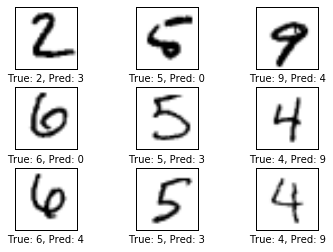

In [120]:
# 有一些结果还是比较 weird 的
plot_example_errors()

[[ 955    7    0    6    0    0   10    1    1    0]
 [   0 1124    0    7    0    0    3    0    0    1]
 [ 138  189  351  158   12    0  134   19   14   17]
 [  45   69   12  831    0    0    6   11    6   30]
 [  10   60    0    0  576    0   41    2    0  293]
 [ 307  130    0  260   55   41   45   25    2   27]
 [  68   54    0    0   27    0  809    0    0    0]
 [  17  126   16    0   34    0    2  725    0  108]
 [ 114  228    8  219   31    0   37   43  194  100]
 [  39   68    0   11  140    0    2   44    1  704]]


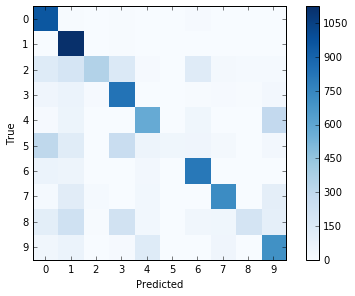

In [122]:
# 打印 confusion matrix 
print_confusion_matrix()

In [123]:
# 1000 次迭代的话，如何？
optimize(num_iterations=900)   # 已经迭代过100次了

Optimization Iteration:      1, Training Accuracy: 0.609375
Optimization Iteration:    101, Training Accuracy: 0.734375
Optimization Iteration:    201, Training Accuracy: 0.796875
Optimization Iteration:    301, Training Accuracy: 0.890625
Optimization Iteration:    401, Training Accuracy: 0.921875
Optimization Iteration:    501, Training Accuracy: 0.875
Optimization Iteration:    601, Training Accuracy: 0.828125
Optimization Iteration:    701, Training Accuracy: 0.90625
Optimization Iteration:    801, Training Accuracy: 0.9375
Time usages: 0:01:36


In [124]:
print_accuracy()

Accuracy on test-set: 93.0%


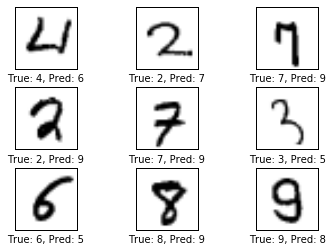

In [125]:
plot_example_errors()    # 仍然有一些奇怪 ...

[[ 968    0    2    1    0    4    3    1    1    0]
 [   0 1104    3    2    1    2    5    0   18    0]
 [  16    1  934    9   14    2    6   14   33    3]
 [   5    2   16  897    0   38    0   11   30   11]
 [   1    2    4    0  930    0   11    2    2   30]
 [  10    2    1    8    5  843    7    1   10    5]
 [  17    3    3    0   10   19  904    0    2    0]
 [   3    8   27    3    4    0    0  920    5   58]
 [  13    3    6   13   15   23    6    6  868   21]
 [  13    4    5    8   29    8    0    8    4  930]]


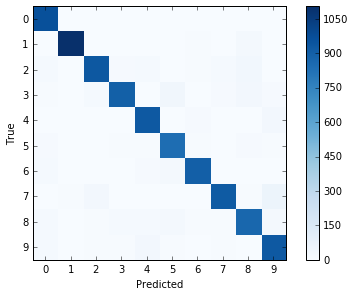

In [127]:
print_confusion_matrix()

In [128]:
# 10000 次迭代的话，如何？
optimize(num_iterations=9000)   # 已经迭代过1000次了

Optimization Iteration:    901, Training Accuracy: 0.90625
Optimization Iteration:   1001, Training Accuracy: 0.921875
Optimization Iteration:   1101, Training Accuracy: 0.9375
Optimization Iteration:   1201, Training Accuracy: 0.953125
Optimization Iteration:   1301, Training Accuracy: 0.9375
Optimization Iteration:   1401, Training Accuracy: 0.96875
Optimization Iteration:   1501, Training Accuracy: 0.890625
Optimization Iteration:   1601, Training Accuracy: 0.96875
Optimization Iteration:   1701, Training Accuracy: 0.953125
Optimization Iteration:   1801, Training Accuracy: 0.9375
Optimization Iteration:   1901, Training Accuracy: 0.921875
Optimization Iteration:   2001, Training Accuracy: 0.9375
Optimization Iteration:   2101, Training Accuracy: 0.984375
Optimization Iteration:   2201, Training Accuracy: 0.90625
Optimization Iteration:   2301, Training Accuracy: 0.984375
Optimization Iteration:   2401, Training Accuracy: 0.984375
Optimization Iteration:   2501, Training Accuracy: 0

In [129]:
print_accuracy()

Accuracy on test-set: 98.5%


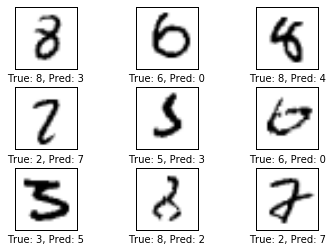

In [130]:
plot_example_errors()    # looks better

[[ 975    0    0    0    0    2    1    1    1    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   5    6 1011    2    1    0    0    5    2    0]
 [   1    0    0 1001    0    5    0    1    2    0]
 [   0    1    0    0  975    0    1    1    0    4]
 [   2    0    0    3    0  884    1    0    1    1]
 [   6    3    0    1    1    6  941    0    0    0]
 [   1    4    2    1    0    0    0 1020    0    0]
 [   5    2    5   18    4    5    0    3  926    6]
 [   2    5    0    3    7    4    0    7    0  981]]


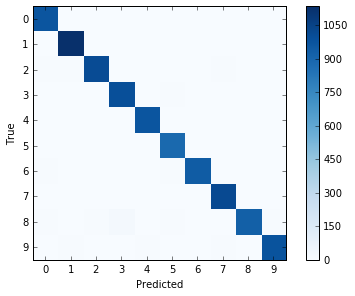

In [132]:
print_confusion_matrix()

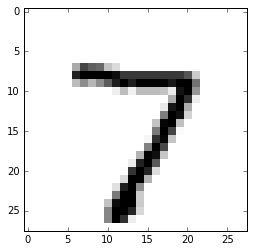

In [142]:
# 来看一下图片和权重以及 Conv 层输出图片的例子
image1 = data.test.images[0]
plot_image(image1)

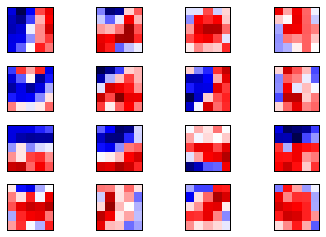

In [140]:
# 看看第一层的第一个 channel 上的权重，红色为正，蓝色为负；看的人一头大包，没啥规律可言
plot_conv_weights(weights=weight_conv1)

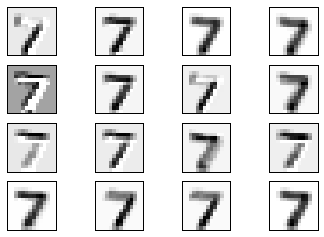

In [143]:
# 看看第一层 Conv 输出好了，看到经过第一层 Conv，不同的 filter 会对不同的位置做强化或者弱化
plot_conv_layer(layer=layer_conv1, image=image1)

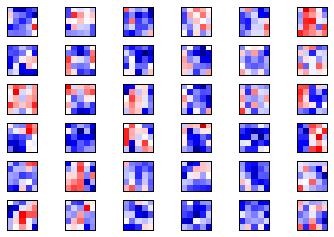

In [144]:
# 看看第二层权重，仍然一头雾水
plot_conv_weights(weights=weight_conv2, input_channel=0)

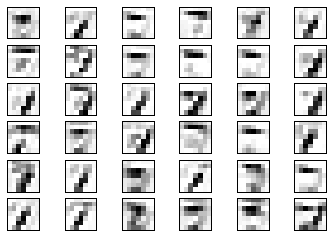

In [145]:
# 看看第二个 Conv 层输出，已经被缩到了 7*7
plot_conv_layer(layer=layer_conv2, image=image1)